# Polynomial Regression

In this example, we are not splitting into test and training set, because the data is so small. All we're doing is fitting a curve.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [13]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #First column is redundant. Dataset is already encoded
y = dataset.iloc[:, -1].values

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset
This is for testing, to see how much better the polynomial regression fits the data.

In [16]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

y = b0 + b1x1 + b2x1^2 + ... + bnx1x^n

linear combination of a single feature, raised to different powers

In [22]:
from sklearn.preprocessing import PolynomialFeatures
pReg = PolynomialFeatures(degree = 100) # degree is the number of powers we're adding up to. This thing generates the polynomial. We then put that into a linear regressor, with each term being like a new feature.

xPoly = pReg.fit_transform(X)

linReg2 = LinearRegression()
linReg2.fit(xPoly, y)


LinearRegression()

## Visualising the Linear Regression results

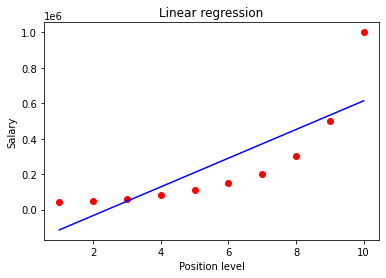

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linReg.predict(X), color = 'blue')
plt.title('Linear regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results

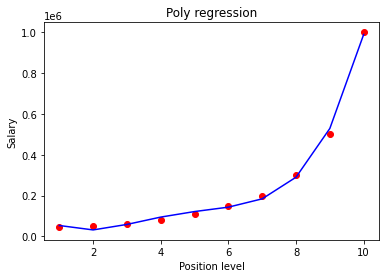

In [24]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linReg2.predict(xPoly), color = 'blue')
plt.title('Poly regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

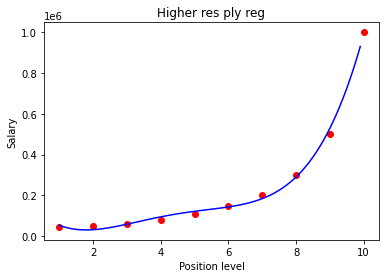

In [32]:
xGrid = np.arange(min(X), max(X), 0.1)
xGrid = xGrid.reshape((-1, 1)) # need 2D array
plt.scatter(X, y, color = 'red')
plt.plot(xGrid, linReg2.predict(pReg.fit_transform(xGrid)), color = 'blue')
plt.title("Higher res ply reg")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Predicting a new result with Linear Regression

In [35]:
x = np.array(6.5)
x = x.reshape(1, -1)

linPred = linReg.predict(x)
print(linPred)

[[6.5]]
[330378.78787879]


## Predicting a new result with Polynomial Regression

In [37]:
xP = pReg.fit_transform([[6.5]])
pPred = linReg2.predict(xP)
print(pPred)

[[6.5]]
[158862.45265155]
